In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import itertools
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture

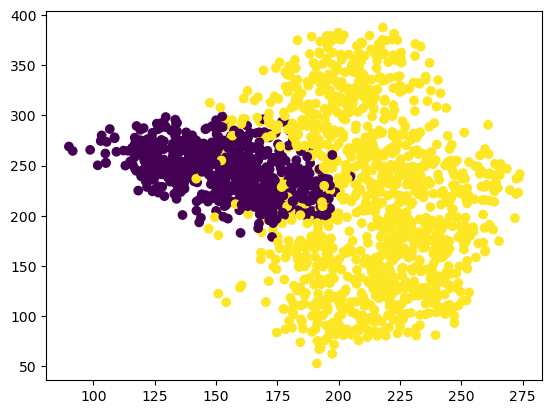

In [2]:
data = pd.read_csv('../Desktop/ćwiczenia na KMeans/hyperplane.csv')
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns = ['color']))
plt.scatter(data['x'], data['y'], c = data['color'])
plt.show()

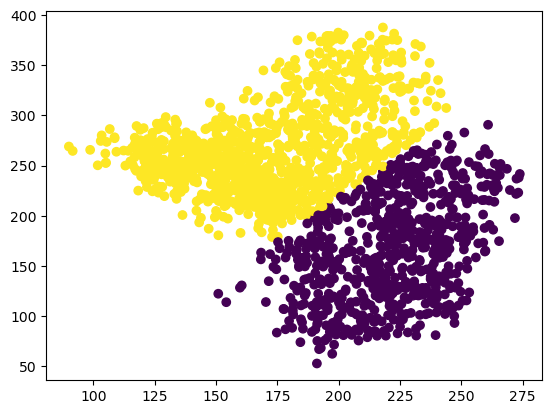

In [9]:
gmm = GaussianMixture(n_components=2, covariance_type='full')
labels = gmm.fit_predict(data_scaled)
plt.scatter(data['x'], data['y'], c = labels)
plt.show()
#gaussian nieodpowiedni

C:\Users\Marcel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


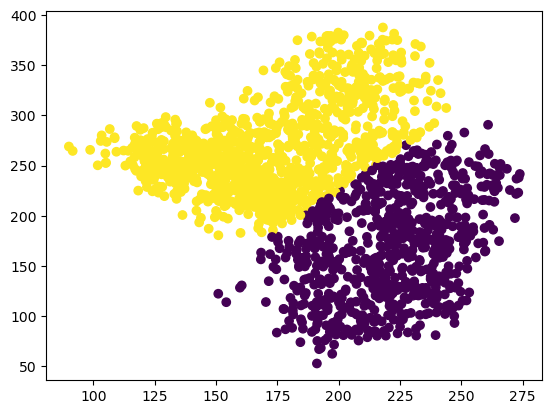

In [3]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data_scaled)
plt.scatter(data['x'], data['y'], c = kmeans.labels_)
plt.show()
#kmeans nieodpowiednie

In [4]:
dbscan = DBSCAN(eps = 0.1, min_samples = 1)
dbscan.fit(data_scaled)

DBSCAN(eps=0.1, min_samples=1)

In [5]:
# Zliczam wystąpienia klas, dzięki czemu mogę najliczniej występującej liczbie przypisać jedną klasę, a wszystkim innym drugą klasę
# Dzięki temu w kolejnym kroku eksperymentując z eps i min_samples będę miał na wykresie lepiej wszystko pokazane
labels_count = dbscan.labels_
unique_values, counts = np.unique(labels_count, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Liczba {value} występuje {count} razy")

Liczba 0 występuje 1246 razy
Liczba 1 występuje 103 razy
Liczba 2 występuje 21 razy
Liczba 3 występuje 15 razy
Liczba 4 występuje 3 razy
Liczba 5 występuje 1 razy
Liczba 6 występuje 5 razy
Liczba 7 występuje 2 razy
Liczba 8 występuje 12 razy
Liczba 9 występuje 1 razy
Liczba 10 występuje 1 razy
Liczba 11 występuje 2 razy
Liczba 12 występuje 8 razy
Liczba 13 występuje 3 razy
Liczba 14 występuje 11 razy
Liczba 15 występuje 2 razy
Liczba 16 występuje 3 razy
Liczba 17 występuje 1 razy
Liczba 18 występuje 3 razy
Liczba 19 występuje 84 razy
Liczba 20 występuje 2 razy
Liczba 21 występuje 1 razy
Liczba 22 występuje 10 razy
Liczba 23 występuje 1 razy
Liczba 24 występuje 1 razy
Liczba 25 występuje 1 razy
Liczba 26 występuje 4 razy
Liczba 27 występuje 2 razy
Liczba 28 występuje 1 razy
Liczba 29 występuje 8 razy
Liczba 30 występuje 2 razy
Liczba 31 występuje 3 razy
Liczba 32 występuje 13 razy
Liczba 33 występuje 13 razy
Liczba 34 występuje 1 razy
Liczba 35 występuje 3 razy
Liczba 36 występuje 11 ra

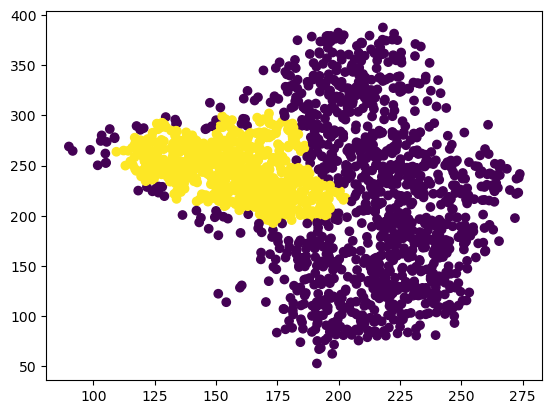

Adjusted Rand Index: 0.7072634940614908


In [6]:
dbscan = DBSCAN(eps = 0.084, min_samples = 1)
dbscan.fit(data_scaled)
labels_count = dbscan.labels_
labels_count[labels_count !=1] = 0
plt.scatter(data['x'], data['y'], c = labels_count)
plt.show()
ari = adjusted_rand_score(data['color'], labels_count)
print(f"Adjusted Rand Index: {ari}")

In [ ]:
#najlepszy wynik jaki jestem w stanie osiągnąć to ARI = 0.70